# Python setup for Elmer

- create meshes
- parametrize problems
- run Elmer
- visualize and postprocess
- compare different versions

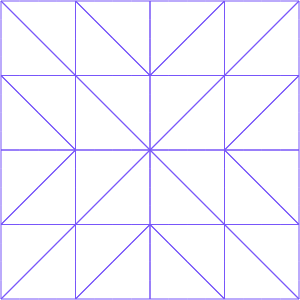

In [1]:
import skfem as fem

m = fem.MeshTri.init_sqsymmetric().refined(1)
m  # use this in Elmer?

In [2]:
sif = """
Check Keywords "Warn"

Header
  Mesh DB "." "."
End

Simulation
  Max Output Level = 5
  Coordinate System = Cartesian
  Simulation Type = Steady
  Output Intervals(1) = 1
  Steady State Max Iterations = 1
  Post File = "results.vtu"
End
"""

In [3]:
sif += """
Body 1
  Equation = 1
  Body Force = 1
End

Body Force 1 :: Source = Real {}
Equation 1 :: Active Solvers(1) = 1

Solver 1
  Equation = "Poisson"
  Variable = "Potential"
  Variable DOFs = 1
  Procedure = "Poisson" "PoissonSolver"
  Linear System Solver = "Direct"
  Linear System Direct Method = UMFPack
  Steady State Convergence Tolerance = 1e-09
End

Boundary Condition 1
  Target Boundaries(4) = 1 2 3 4
  Potential = Real 0
End
""".format(1.0)  # parametrization

In [5]:
import elmer

case = elmer.Case(m, sif)
results = case.run(
    image='elmer-66fb3dda',  # container image (one per commit)
    fetch='results_t0001.vtu',
    verbose=True,
)

ELMER SOLVER (v 8.4) STARTED AT: 2021/06/02 08:58:44
ParCommInit:  Initialize #PEs:            1
MAIN: 
MAIN: =============================================================
MAIN: ElmerSolver finite element software, Welcome!
MAIN: This program is free software licensed under (L)GPL
MAIN: Copyright 1st April 1995 - , CSC - IT Center for Science Ltd.
MAIN: Webpage http://www.csc.fi/elmer, Email elmeradm@csc.fi
MAIN: Version: 8.4 (Rev: 66fb3dda, Compiled: 2021-06-01)
MAIN:  Running one task without MPI parallelization.
MAIN:  Running with just one thread per task.
MAIN: =============================================================
LoadInputFile: Reading only "Run Control" section
MAIN: 
MAIN: 
MAIN: -------------------------------------
MAIN: Reading Model: /tmps_t2l8qi.sif
LoadInputFile: Scanning input file: /tmps_t2l8qi.sif
LoadInputFile: Scanning only size info
LoadInputFile: First time visiting
LoadInputFile: Reading base load of sif file
LoadInputFile: Loading input file: /tmps_t2l8qi

In [6]:
results

<meshio mesh object>
  Number of points: 25
  Number of cells:
    triangle: 32
    line: 16
  Point data: potential
  Cell data: GeometryIds

In [7]:
results.point_data['potential']

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.078125  ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.04427083],
       [0.        ],
       [0.05729167],
       [0.04427083],
       [0.        ],
       [0.05729167],
       [0.        ],
       [0.05729167],
       [0.04427083],
       [0.05729167],
       [0.04427083],
       [0.        ],
       [0.        ],
       [0.        ]])

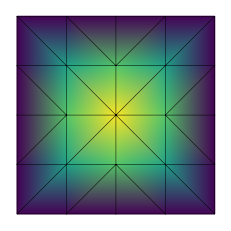

In [11]:
from skfem.visuals.matplotlib import plot, draw, show

ax = draw(m)
plot(m, results.point_data['potential'].flatten(), ax=ax, shading='gouraud')

# Python setup for Elmer

- Python code: https://github.com/kinnala/elmer-runner
- Elmer compile-in-docker: https://github.com/kinnala/elmer-docker